In [170]:
import h5py

In [171]:
from numpy import *

In [172]:
murange = array([0, 0.2, 0.4, 0.6])

In [173]:
fnames = ['data.hdf5', 'data_02.hdf5', 'data_04.hdf5', 'data_06.hdf5']

In [174]:
folder = 'morepoints/'

In [175]:
dfs = [h5py.File(folder+fname) for fname in fnames] 

In [176]:
Trange = dfs[0].attrs['Trange']
Tkeys = list(dfs[0].keys())

In [177]:
Tkeys

['170', '199', '230', '260', '290', '320', '349', '379']

In [178]:
Ps_mu = []

for df in dfs:
    Ps = []
    for Tkey in Tkeys:
        Ps += [float(df[Tkey].attrs['Ptot'])]
    Ps_mu += [Ps]

/tmp/ipykernel_298609/2081089261.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Ps += [float(df[Tkey].attrs['Ptot'])]


In [179]:
Ps_mu = array(Ps_mu)

In [180]:
Ps_mu.shape

(4, 8)

In [181]:
from scipy.optimize import least_squares

In [182]:
def fit_func(x, muT):
    return x[0]/2 * (muT)**2 + x[1]/4*(muT)**4

In [183]:
import matplotlib
matplotlib.style.use('publication')

0.170253
[0.02616187 0.51187444]
0.199455
[ 0.3904522  -0.83380488]
0.230475
[ 0.33274822 -0.46691941]
0.26044
[0.22225353 0.42844027]
0.290258
[0.23612108 0.32803311]
0.320077
[ 0.30864749 -0.23146103]
0.349595
[ 0.29288687 -0.12037684]
0.379873
[0.29167189 0.20759493]


(0.0, 0.25)

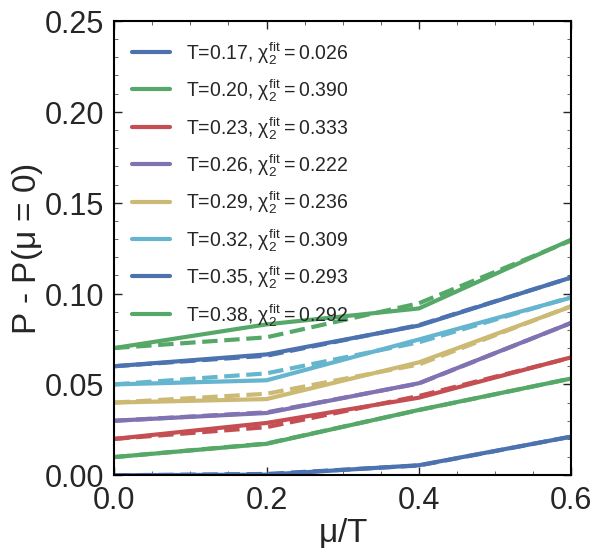

In [184]:
chis = []
for i in range(8):
    T = Trange[i]
    print(T)
    
    sol = least_squares(lambda z: fit_func(z, murange) - (Ps_mu[:, i] - Ps_mu[0, i])/T**4, [0.15, 0.2])
    sol
    
    
    print(sol.x)
    shift = 0.01*i
    l, = plt.plot(murange, shift + (Ps_mu[:, i] - Ps_mu[0, i])/T**4, label='T=%.2f, $\chi_2^{fit} = %.3f$'%(T, sol.x[0]))
    plt.plot(murange, shift + fit_func(sol.x, murange), ls='--', c=l.get_c())
    chis += [sol.x]
plt.legend(fontsize=14)

plt.xlabel('$\mu/T$')
plt.ylabel('P - P($\mu$ = 0)')
plt.savefig('Pmu_fit.pdf', bbox_inches='tight')

plt.ylim(0, 0.25)

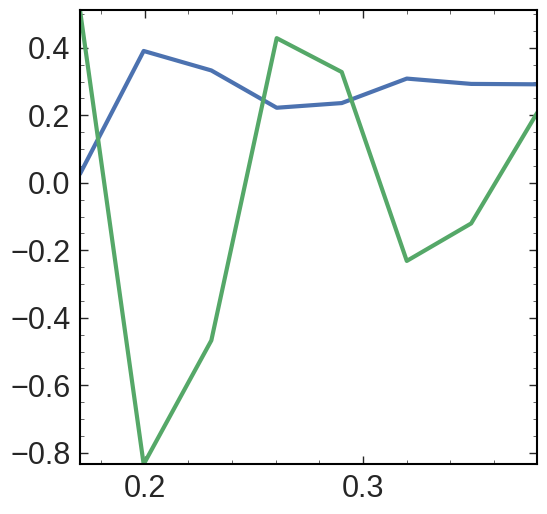

In [185]:
plt.plot(Trange, chis)